**Name: Vinit Nalawade**

In [1]:
#import required libraries
import pandas as pd
import numpy as np
#for counter operations
from collections import Counter
#for plotting graphs
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)
%matplotlib inline

C:\Users\Vinit\AppData\Local\Enthought\Canopy\User\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


**Part One:** Go to the <a href = "https://www.ssa.gov/oact/babynames/numberUSbirths.html">Social Security Administration US births website</a> and select the births table there and copy it to your clipboard. Use the pandas read_clipboard function to read the table into Python, and use matplotlib to plot male and female births for the years covered in the data. 

In [2]:
#informing python that ',' indicates thousands
df = pd.read_clipboard(thousands = ',')

In [3]:
df

,Year of birth,Male,Female,Total
0,1880,118399,97604,216003
1,1881,108282,98855,207137
2,1882,122031,115696,237727
3,1883,112478,120059,232537
4,1884,122739,137586,260325
5,1885,115946,141949,257895
6,1886,119042,153736,272778
7,1887,109315,155422,264737
8,1888,129905,189447,319352
9,1889,119034,189219,308253


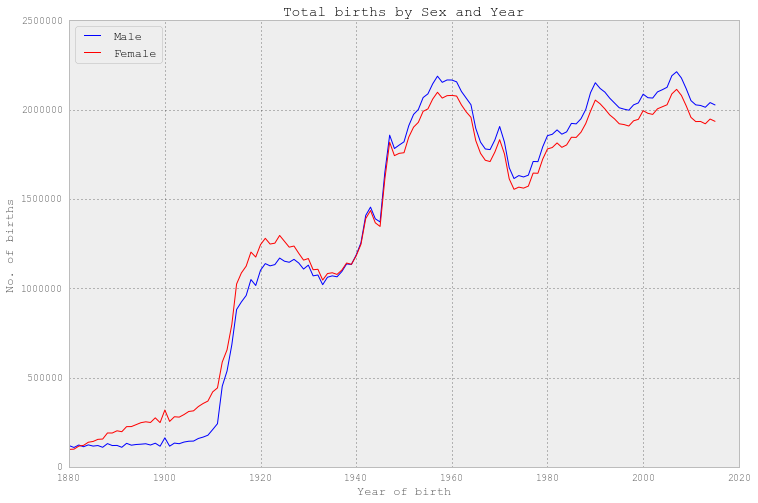

In [4]:
#plot male and female births for the years covered in the data
plt.plot(df['Year of birth'], df['Male'], c = 'b', label = 'Male')
plt.plot(df['Year of birth'], df['Female'],c = 'r', label = 'Female')
plt.legend(loc = 'upper left')
#plt.axis([1880, 2015, 0, 2500000])
plt.xlabel('Year of birth')
plt.ylabel('No. of births')
plt.title('Total births by Sex and Year')
#double the size of plot for visibility
size = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.show()

#plot xkcd style :)
#with plt.xkcd():
    #plt.plot(df['Year of birth'], df['Male'], c = 'b', label = 'Male')
    #plt.plot(df['Year of birth'], df['Female'],c = 'r', label = 'Female')
    #plt.legend(loc = 'upper left')
    #plt.xlim(xmax = 2015)
    #plt.xlabel('Year of birth')
    #plt.ylabel('No. of births')
    #plt.title('Male and Female births from 1880 to 2015')
    #plt.show()

In the same notebook, use Python to get a list of male and female names from these files. This data is broken down by year of birth.
<br>The files contain names data of the years from **1881 to 2010**.
<br>Aggregating this data in **"names"** dataframe below.

In [5]:
years = range(1881,2011)
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = 'names/yob{0:d}.txt'.format(year)
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

In [6]:
names.head()

,name,sex,births,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [7]:
names.tail()

,name,sex,births,year
1688779,Zymaire,M,5,2010
1688780,Zyonne,M,5,2010
1688781,Zyquarius,M,5,2010
1688782,Zyran,M,5,2010
1688783,Zzyzx,M,5,2010


**Part Two:** Aggregate the data for all years (see the examples in the Pandas notebooks). Use Python Counters to get letter frequencies for male and female names. Use matplotlib to draw a plot that for each letter (x-axis) shows the frequency of that letter (y-axis) as the last letter for both for male and female names.

The data is already agregated in "names" dataframe.
<br>Getting separate dataframes for Males and Females.
<br>Defining a List for male and female names.

In [8]:
female_names = names[names.sex == 'F']
male_names = names[names.sex == 'M']
print "For Female names"
print female_names.head()
print "\nFor Male names"
print male_names.tail()

female_list = list(female_names['name'])
male_list = list(male_names['name'])

For Female names
        name sex  births  year
0       Mary   F    6919  1881
1       Anna   F    2698  1881
2       Emma   F    2034  1881
3  Elizabeth   F    1852  1881
4   Margaret   F    1658  1881

For Male names
              name sex  births  year
1688779    Zymaire   M       5  2010
1688780     Zyonne   M       5  2010
1688781  Zyquarius   M       5  2010
1688782      Zyran   M       5  2010
1688783      Zzyzx   M       5  2010


Calculating the letter frequency for male names.

In [9]:
male_letter_freq = Counter()
#converting every letter to lowercase
for name in map(lambda x:x.lower(),male_names['name']):
    for i in name:
        male_letter_freq[i] += 1
male_letter_freq

Counter({'a': 473311,
         'b': 68392,
         'c': 113693,
         'd': 174305,
         'e': 461160,
         'f': 35285,
         'g': 54872,
         'h': 127314,
         'i': 294758,
         'j': 64378,
         'k': 75215,
         'l': 288703,
         'm': 134677,
         'n': 367462,
         'o': 286286,
         'p': 31022,
         'q': 10758,
         'r': 358075,
         's': 181320,
         't': 164948,
         'u': 99128,
         'v': 59996,
         'w': 38851,
         'x': 7561,
         'y': 114680,
         'z': 23641})

Calculating the letter frequency for female names.

In [10]:
female_letter_freq = Counter()
#converting every letter to lowercase
for name in map(lambda x:x.lower(),female_names['name']):
    for i in name:
        female_letter_freq[i] += 1
female_letter_freq

Counter({'a': 1106691,
         'b': 73211,
         'c': 153819,
         'd': 184736,
         'e': 808732,
         'f': 28774,
         'g': 62188,
         'h': 219581,
         'i': 558570,
         'j': 82958,
         'k': 111843,
         'l': 499178,
         'm': 188030,
         'n': 586892,
         'o': 208432,
         'p': 31781,
         'q': 12479,
         'r': 418955,
         's': 271518,
         't': 267157,
         'u': 86084,
         'v': 66889,
         'w': 23138,
         'x': 7608,
         'y': 221353,
         'z': 35572})

Calculating the last letter frequency for male names.

In [11]:
male_last_letter_freq = Counter()
for name in male_names['name']:
    male_last_letter_freq[name[-1]] += 1
male_last_letter_freq

Counter({'a': 24564,
         'b': 3222,
         'c': 5033,
         'd': 36761,
         'e': 89489,
         'f': 3042,
         'g': 5071,
         'h': 17462,
         'i': 17253,
         'j': 1200,
         'k': 13634,
         'l': 59630,
         'm': 12404,
         'n': 162164,
         'o': 54056,
         'p': 1941,
         'q': 500,
         'r': 39092,
         's': 51797,
         't': 21226,
         'u': 2657,
         'v': 1379,
         'w': 2230,
         'x': 1920,
         'y': 53839,
         'z': 4175})

Calculating the last letter frequency for female names.

In [12]:
female_last_letter_freq = Counter()
for name in female_names['name']:
    female_last_letter_freq[name[-1]] += 1
female_last_letter_freq

Counter({'a': 422651,
         'b': 441,
         'c': 760,
         'd': 6464,
         'e': 226254,
         'f': 125,
         'g': 1735,
         'h': 38365,
         'i': 44042,
         'j': 157,
         'k': 1548,
         'l': 35834,
         'm': 3610,
         'n': 101182,
         'o': 8316,
         'p': 355,
         'q': 24,
         'r': 14056,
         's': 19402,
         't': 10528,
         'u': 2019,
         'v': 107,
         'w': 640,
         'x': 843,
         'y': 61742,
         'z': 1843})

Plot for each letter showing the frequency of that letter as the last letter for both for male and female names.
<br>I use the OrderedDict function from collections here to arrange the letters present in counter in acsending order for plotting.

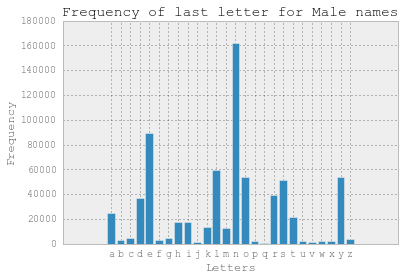

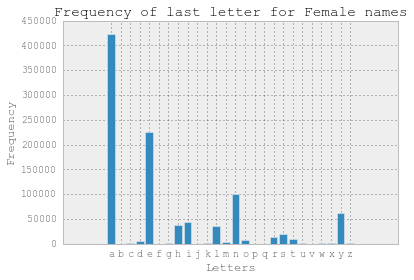

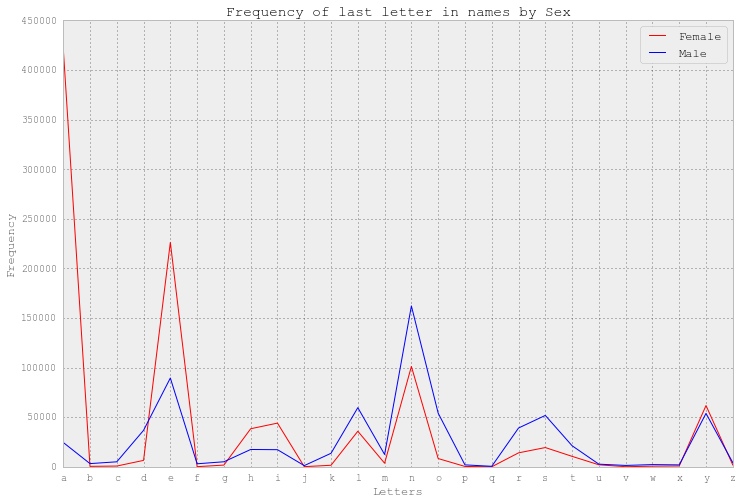

In [13]:
#for ordering items of counter in ascending order
from collections import OrderedDict
#plot of last letter frequency of male names in ascending order of letters
male_last_letter_freq_asc = OrderedDict(sorted(male_last_letter_freq.items()))
plt.bar(range(len(male_last_letter_freq_asc)), male_last_letter_freq_asc.values(), align='center')
plt.xticks(range(len(male_last_letter_freq_asc)), male_last_letter_freq_asc.keys())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency of last letter for Male names')
plt.show()

#plot of last letter frequency of female names in ascending order of letters
female_last_letter_freq_asc = OrderedDict(sorted(female_last_letter_freq.items()))
plt.bar(range(len(female_last_letter_freq_asc)), female_last_letter_freq_asc.values(), align='center')
plt.xticks(range(len(female_last_letter_freq_asc)), female_last_letter_freq_asc.keys())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency of last letter for Female names')
plt.show()

female_last_letter_freq_asc = OrderedDict(sorted(female_last_letter_freq.items()))
plt.plot(range(len(female_last_letter_freq_asc)), female_last_letter_freq_asc.values(), c = 'r', label = 'Female')
plt.plot(range(len(male_last_letter_freq_asc)), male_last_letter_freq_asc.values(), c = 'b', label = 'Male')
plt.xticks(range(len(male_last_letter_freq_asc)), male_last_letter_freq_asc.keys())
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.title('Frequency of last letter in names by Sex')
#double the size of plot for visibility
size = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.show()



**Part Three:** Now do just female names, but aggregate your data in decades (10 year) increments. Produce a plot that contains the 1880s line, the 1940s line, and the 1990s line, as well as the female line for all years aggregated together from Part Two. Evaluate how stable this statistic is. Speculate on why it is is stable, if it is, or on what demographic facts might explain any changes, if there are any. Turn in your ipython notebook file, showing the code you used to complete parts One, Two, an Three.

In [18]:
#to get the decade lists
#female_1880 = female_names[female_names['year'] < 1890]
#female_1890 = female_names[(female_names['year'] >= 1890) & (female_names['year'] < 1900)]
#female_1900 = female_names[(female_names['year'] >= 1900) & (female_names['year'] < 1910)]
#female_1910 = female_names[(female_names['year'] >= 1910) & (female_names['year'] < 1920)]
#female_1920 = female_names[(female_names['year'] >= 1920) & (female_names['year'] < 1930)]
#female_1930 = female_names[(female_names['year'] >= 1930) & (female_names['year'] < 1940)]
#female_1940 = female_names[(female_names['year'] >= 1940) & (female_names['year'] < 1950)]
#female_1950 = female_names[(female_names['year'] >= 1950) & (female_names['year'] < 1960)]
#female_1960 = female_names[(female_names['year'] >= 1960) & (female_names['year'] < 1970)]
#female_1970 = female_names[(female_names['year'] >= 1970) & (female_names['year'] < 1980)]
#female_1980 = female_names[(female_names['year'] >= 1980) & (female_names['year'] < 1990)]
#female_1990 = female_names[(female_names['year'] >= 1990) & (female_names['year'] < 2000)]
#female_2000 = female_names[(female_names['year'] >= 2000) & (female_names['year'] < 2010)]
#female_2010 = female_names[female_names['year'] >= 2010]

#another earier way to get the decade lists for females
female_1880 = female_names[female_names.year.isin(range(1880,1890))]
female_1890 = female_names[female_names.year.isin(range(1890,1900))]
female_1900 = female_names[female_names.year.isin(range(1900,1910))]
female_1910 = female_names[female_names.year.isin(range(1910,1920))]
female_1920 = female_names[female_names.year.isin(range(1920,1930))]
female_1930 = female_names[female_names.year.isin(range(1930,1940))]
female_1940 = female_names[female_names.year.isin(range(1940,1950))]
female_1950 = female_names[female_names.year.isin(range(1950,1960))]
female_1960 = female_names[female_names.year.isin(range(1960,1970))]
female_1970 = female_names[female_names.year.isin(range(1970,1980))]
female_1980 = female_names[female_names.year.isin(range(1980,1990))]
female_1990 = female_names[female_names.year.isin(range(1990,2000))]
female_2000 = female_names[female_names.year.isin(range(2000,2010))]
female_2010 = female_names[female_names.year.isin(range(2010,2011))] #just the year 2010 present

#to verify sorting of data
print female_1880.head()
print female_1880.tail()


        name sex  births  year
0       Mary   F    6919  1881
1       Anna   F    2698  1881
2       Emma   F    2034  1881
3  Elizabeth   F    1852  1881
4   Margaret   F    1658  1881
         name sex  births  year
19627  Wessie   F       5  1889
19628   Zepha   F       5  1889
19629  Zilpha   F       5  1889
19630  Zulema   F       5  1889
19631    Zuma   F       5  1889


Preparing data for the 1880s.
<br>A counter for last letter frequencies.

In [19]:
female_1880_freq = Counter()
for name in female_1880['name']:
    female_1880_freq[name[-1]] += 1
female_1880_freq

Counter({'a': 4718,
         'c': 2,
         'd': 111,
         'e': 3854,
         'g': 15,
         'h': 307,
         'i': 24,
         'k': 12,
         'l': 324,
         'm': 29,
         'n': 329,
         'o': 54,
         'r': 176,
         's': 220,
         't': 132,
         'u': 22,
         'w': 2,
         'x': 1,
         'y': 586,
         'z': 12})

Preparing data for the 1940s.
<br>A counter for last letter frequencies.

In [20]:
female_1940_freq = Counter()
for name in female_1940['name']:
    female_1940_freq[name[-1]] += 1
female_1940_freq

Counter({'a': 20207,
         'b': 18,
         'c': 14,
         'd': 486,
         'e': 16640,
         'g': 85,
         'h': 928,
         'i': 1308,
         'k': 66,
         'l': 2580,
         'm': 135,
         'n': 6135,
         'o': 333,
         'p': 19,
         'r': 719,
         's': 1470,
         't': 629,
         'u': 120,
         'v': 10,
         'w': 31,
         'x': 44,
         'y': 3178,
         'z': 75})

Preparing data for the 1990s.
<br>A counter for last letter frequencies.

In [21]:
female_1990_freq = Counter()
for name in female_1990['name']:
    female_1990_freq[name[-1]] += 1
female_1990_freq

Counter({'a': 71322,
         'b': 105,
         'c': 159,
         'd': 663,
         'e': 28064,
         'f': 28,
         'g': 331,
         'h': 7263,
         'i': 8893,
         'j': 55,
         'k': 233,
         'l': 4734,
         'm': 672,
         'n': 17677,
         'o': 1083,
         'p': 100,
         'q': 2,
         'r': 2218,
         's': 2434,
         't': 1454,
         'u': 349,
         'v': 19,
         'w': 93,
         'x': 157,
         'y': 10689,
         'z': 348})

Converting the frequency data from counter to dataframes after sorting the letters alphabetically.

In [22]:
#for 1880s
first = pd.DataFrame.from_dict((OrderedDict(sorted(female_1880_freq.items()))), orient = 'index').reset_index()
first.columns = ['letter','frequency']
first['decade'] = '1880s'
print first.head()

#for 1940s
second = pd.DataFrame.from_dict((OrderedDict(sorted(female_1940_freq.items()))), orient = 'index').reset_index()
second.columns = ['letter','frequency']
second['decade'] = '1940s'
print second.head()

#for 1990s
third = pd.DataFrame.from_dict((OrderedDict(sorted(female_1990_freq.items()))), orient = 'index').reset_index()
third.columns = ['letter','frequency']
third['decade'] = '1990s'
print third.head()

  letter  frequency decade
0      a       4718  1880s
1      c          2  1880s
2      d        111  1880s
3      e       3854  1880s
4      g         15  1880s
  letter  frequency decade
0      a      20207  1940s
1      b         18  1940s
2      c         14  1940s
3      d        486  1940s
4      e      16640  1940s
  letter  frequency decade
0      a      71322  1990s
1      b        105  1990s
2      c        159  1990s
3      d        663  1990s
4      e      28064  1990s


Aggregating all required decades (1880s, 1940s, 1990s) into a single dataframe and then into a pivot table for ease in plotting graphs.

In [23]:
#Aggregate 1880s, 1940s and 1990s frequencies
frames = [first, second, third]
columns = ["letter","frequency", "decade"]

req_decades = pd.DataFrame(pd.concat(frames))
req_decades.columns = columns
print req_decades.head()
print req_decades.tail()

#Get data into a pivot table for ease in plotting
decades_table = pd.pivot_table(req_decades, index=['letter'], values=['frequency'], columns=['decade'])
decades_table.head()

  letter  frequency decade
0      a       4718  1880s
1      c          2  1880s
2      d        111  1880s
3      e       3854  1880s
4      g         15  1880s
   letter  frequency decade
21      v         19  1990s
22      w         93  1990s
23      x        157  1990s
24      y      10689  1990s
25      z        348  1990s


frequency                  
decade     1880s    1940s    1990s
letter                            
a         4718.0  20207.0  71322.0
b            NaN     18.0    105.0
c            2.0     14.0    159.0
d          111.0    486.0    663.0
e         3854.0  16640.0  28064.0

Plot of last letter of females for 1880s , 1940s, 1990s, and for all years (from part 2).

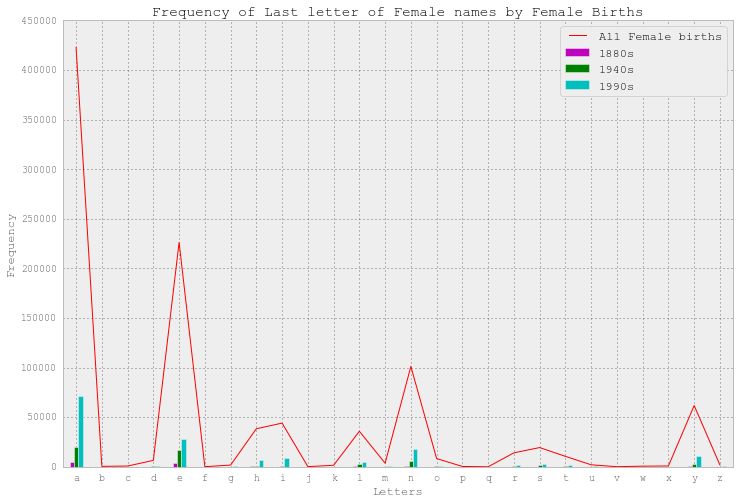

In [24]:
#plot the decades as bars and the female line for all years as a line
c = ['m','g','c']
decades_table['frequency'].plot(kind = 'bar', rot = 0,color = c, title = 'Frequency of Last letter of Female names by Female Births')
#the female line for all years taken from part 2
plt.plot(range(len(female_last_letter_freq_asc)), female_last_letter_freq_asc.values(), c = 'r', label = 'All Female births')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
#double the size of plot for visibility
size = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.show()

The graph has extreme variations in highs and lows.
<br>Plotting the logarithmic scale of frequencies takes care of this and makes it easier for comparison.

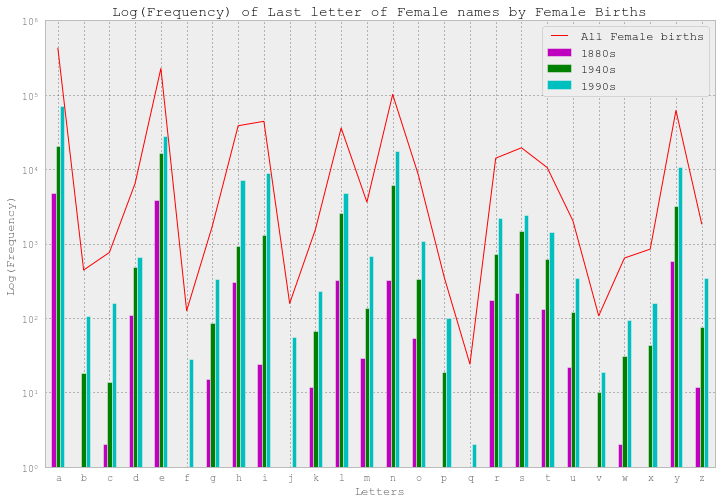

In [25]:
#plot the decades as bars and the female line for all years as a line
c = ['m','g','c']
decades_table['frequency'].plot(kind = 'bar', rot = 0, logy = 'True',color = c, title = 'Log(Frequency) of Last letter of Female names by Female Births')
#the female line for all years taken from part 2
plt.plot(range(len(female_last_letter_freq_asc)), female_last_letter_freq_asc.values(), c = 'r', label = 'All Female births')
plt.xlabel('Letters')
plt.ylabel('Log(Frequency)')
plt.legend(loc = 'best')
#double the size of plot for visibility
size = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.show()

**Evaluate how stable this statistic is. Speculate on why it is is stable, if it is, or on what demographic facts might explain any changes, if there are any.**

We can normalize the table by total births in each particular decades to compute a new table containing proportion
of total births for each decade ending in each letter.

In [26]:
decades_table.sum()

           decade
frequency  1880s      10930.0
           1940s      55230.0
           1990s     159145.0
dtype: float64

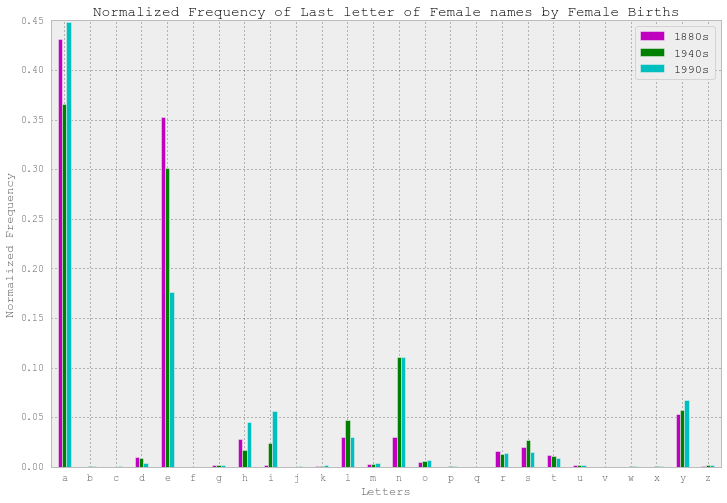

In [27]:
#plot the decades as bars and the female line for all years as a line
c = ['m','g','c']
decades_table_prop = decades_table/decades_table.sum().astype(float)
decades_table_prop['frequency'].plot(kind = 'bar', rot = 0,color = c, title = 'Normalized Frequency of Last letter of Female names by Female Births')
#the female line for all years taken from part 2
#plt.plot(range(len(female_last_letter_freq_asc)), female_last_letter_freq_asc.values(), c = 'r', label = 'All Female births')
plt.xlabel('Letters')
plt.ylabel('Normalized Frequency')
plt.legend(loc = 'best')
#double the size of plot for visibility
size = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches((plSize[0]*size, plSize[1]*size))
plt.show()

The statistics are pretty stable for some letters, but not so stable for other letters.
<br>The letters 'a' and 'e' while decreasing in popularity are still the leading name end letters. There has been a rise in the usage of letters 'n' and 'y' in 1940s and 1990s.
<br>Fewer parents choose common names for their female children as we progress through the decades.
<br>Tradition no longer dictates how female children are named.
<br>We can see in 1880s that majority of female names end in 'a' and 'e'.
<br>In 1940s majority of female names end in 'a', 'e', 'i', 'l', 'n', 's' and 'y' which starts a break from tradition.
<br>In 1990s majority of female names end in 'a', 'e', 'h', 'i', 'l', 'n' and 'y' which signals that while some might still choose traditional names, fashion or trends or uniqueness in names might also dictate how females are named in recent decades.